<a href="https://colab.research.google.com/github/HVBLEGENDZZ9/BASICS-OF-DEEP-LEARNING/blob/main/Neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PREPARING SAMPLE DATA:**

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_circles
x,y = make_circles(2000, noise = 0.02, random_state=42)
x,y

(array([[ 0.48404556, -0.59319406],
        [-0.61228357,  0.80472452],
        [-0.3994865 ,  0.70319738],
        ...,
        [ 0.63132021, -0.74957501],
        [-0.78030607,  0.17699529],
        [ 0.57699301,  0.56513101]]), array([1, 0, 1, ..., 0, 1, 1]))

In [ ]:
circles = pd.DataFrame({"X0":x[:,0],"X1":x[:,1],"Labels":y})
circles

,X0,X1,Labels
0,0.484046,-0.593194,1
1,-0.612284,0.804725,0
2,-0.399486,0.703197,1
3,0.828617,-0.587743,0
4,-0.174154,0.766226,1
...,...,...,...
1995,0.561825,0.583564,1
1996,-0.221132,0.761144,1
1997,0.631320,-0.749575,0
1998,-0.780306,0.176995,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

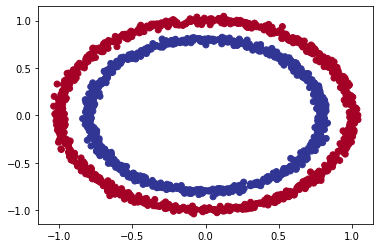

In [ ]:
plt.scatter(x_train[:,0],x_train[:,1],c = y_train,cmap=plt.cm.RdYlBu)

### **BUILDING A MODEL FOR CLASSIFICATION:**

In [ ]:
tf.random.set_seed(42)
model1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])
model1.compile(loss = tf.keras.losses.BinaryCrossentropy(),optimizer = tf.keras.optimizers.SGD(),metrics = 'accuracy')
model1.fit(x_train,y_train,verbose =0,epochs = 100)

In [ ]:
model1.evaluate(x_test,y_test)

13/13 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.5825


[0.694034218788147, 0.5824999809265137]

In [ ]:
y_pred = model1.predict(x_test)

# ***WE CAN SEE..THAT OUR MODEL IS TERRIBLE WITH AN ACCURACY OF 50%***

### **LET'S PLOT AND CHECK**

(-1.1392406099223262, 1.1449162668534216)

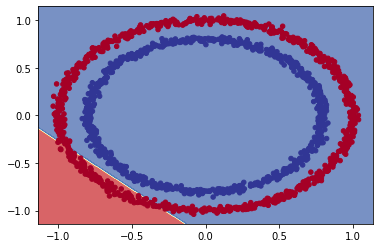

In [ ]:
x_min = x_train[:,0].min() - 0.1
x_max = x_train[:,0].max() + 0.1
y_min = x_train[:,1].min() - 0.1
y_max = x_train[:,1].max() + 0.1
xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))
x_in = np.c_[xx.ravel(),yy.ravel()]
y_pred = model1.predict(x_in)
y_in = np.round(y_pred).reshape(xx.shape)
plt.contourf(xx,yy,y_in,cmap = plt.cm.RdYlBu,alpha = 0.7)
plt.scatter(x_train[:,0],x_train[:,1],c = y_train,s = 20,cmap = plt.cm.RdYlBu)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

###**EVEN IF WE INCREASE THE NUMBER OF HIDDEN LAYERS OR THE NUMBER OF NEURONS, THIS IS STILL NOT GOING TO WORK BECAUSE OF NON LINEARITY IN THE DATA**###
* we are using the linear activation function in model1
* this basically means that we want our neural network to draw a curved decision boundary to classify data, but we have not given it any activation function with which it can draw curved lines or map the data to a non linear space

In [ ]:
#creating a proper classification model, that we got on tensorflow playground
tf.random.set_seed(42)
model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model2.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(),metrics = 'accuracy')
history2 = model2.fit(x_train,y_train,verbose=1,epochs=100)

Epoch 1/100
50/50 [==============================] - 1s 2ms/step - loss: 0.6893 - accuracy: 0.4963
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.5550
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 0.5631 - accuracy: 0.7638
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2244 - accuracy: 0.9912
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 1.0000
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0126 - accuracy: 1.0000
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 11/

In [ ]:
#great accuracy only in 100 epochs. Now let's evaluate our data
model2.evaluate(x_test,y_test)

13/13 [==============================] - 0s 1ms/step - loss: 1.4292e-05 - accuracy: 1.0000


[1.4292490959633142e-05, 1.0]

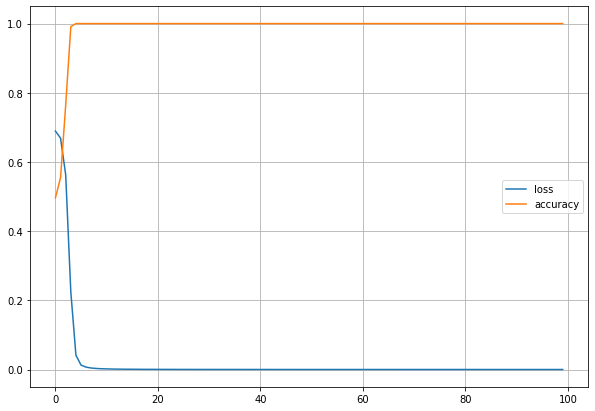

In [ ]:
pd.DataFrame(history2.history).plot(figsize=(10,7))
plt.grid(True)
plt.legend()

###**DEFINING A VERY USEFUL DECISION BOUNDARY PLOTTING FUNCTION**###

In [ ]:
#plotting the decision boundary
def plot_decision_boundary(model,x,y):
  x_min,x_max = x[:,0].min()-0.1,x[:,0].max()+0.1
  y_min,y_max = x[:,1].min()-0.1,x[:,1].max()+0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100), np.linspace(y_min,y_max,100))
  x_in = np.c_[xx.ravel(),yy.ravel()]
  y_pred = model.predict(x_in)
  y_pred = np.round(y_pred).reshape(xx.shape)
  plt.contourf(xx,yy,y_pred,cmap = plt.cm.RdYlBu,alpha = 0.7)
  plt.scatter(x[:,0],x[:,1],c = y,s=20,cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

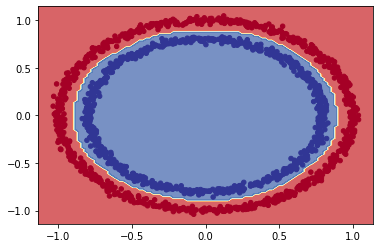

In [ ]:
plot_decision_boundary(model2,x_train,y_train)
#this is for training data

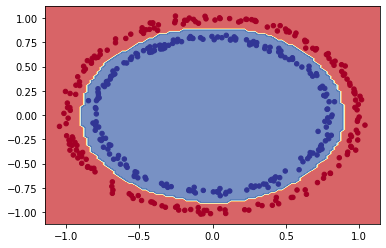

In [ ]:
plot_decision_boundary(model2,x_test,y_test)
#this is for test data

Text(0.5, 1.0, 'TEST DATA')

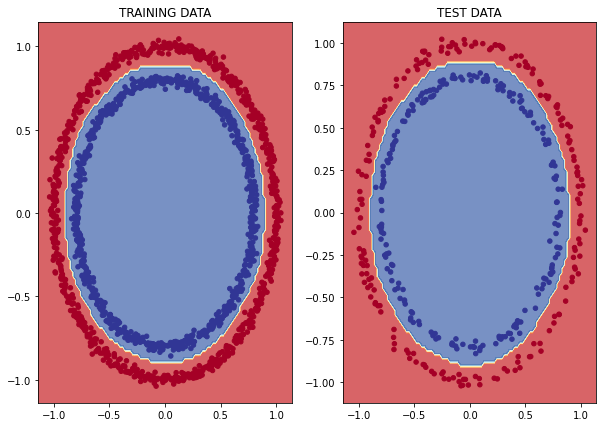

In [ ]:
#plotting side by side
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plot_decision_boundary(model2,x_train,y_train)
plt.title("TRAINING DATA")
plt.subplot(1,2,2)
plot_decision_boundary(model2,x_test,y_test)
plt.title("TEST DATA")

##**USING CALL BACKS TO FIND THE IDEAL LEARNING RATE**###

In [ ]:
tf.random.set_seed(42)
model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation = 'relu'),
  tf.keras.layers.Dense(4,activation= 'relu'),
  tf.keras.layers.Dense(4,activation = 'relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model3.compile(loss = tf.keras.losses.BinaryCrossentropy(),optimizer = tf.keras.optimizers.Adam(),metrics = 'accuracy')

In [ ]:
learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))
history3 = model3.fit(x_train,y_train,callbacks=[learning_rate_scheduler],epochs=100)

Epoch 1/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.5038
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4906
Epoch 3/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4638
Epoch 4/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4350
Epoch 5/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4656
Epoch 6/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4900
Epoch 7/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.4938
Epoch 8/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4837
Epoch 9/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4825
Epoch 10/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.4894
Epoch 11/

In [ ]:
model3.evaluate(x_test,y_test)

13/13 [==============================] - 0s 1ms/step - loss: 0.7054 - accuracy: 0.5075


[0.7053719162940979, 0.5074999928474426]

Text(0.5, 0, 'EPOCHS')

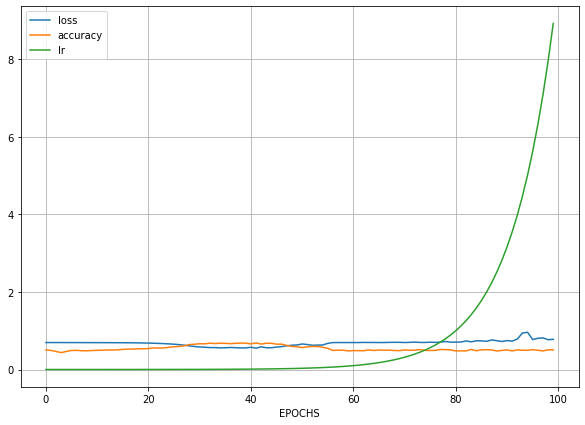

In [ ]:
pd.DataFrame(history3.history).plot(figsize=(10,7))
plt.grid(True)
plt.xlabel('EPOCHS')

###**LETS PLOT LEARNING RATE VS LOSS**###

Text(0, 0.5, 'LOSS')

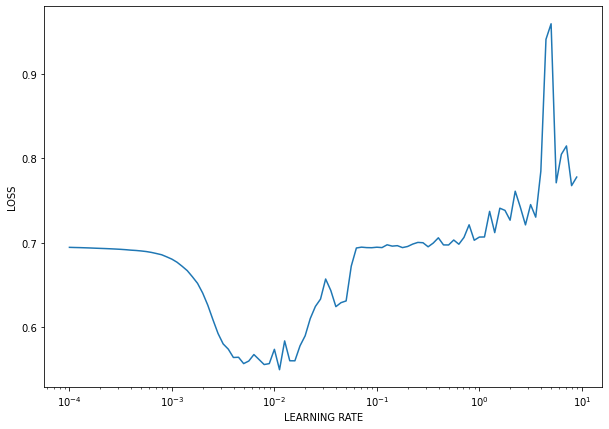

In [ ]:
#lets plot the learning rate vs loss
lr = 1e-4*10**(tf.range(100)/20)
plt.figure(figsize=(10,7))
plt.semilogx(lr,history3.history["loss"])
plt.xlabel("LEARNING RATE")
plt.ylabel("LOSS")

'''the ideal learning rate is usually between the lowest point of the above curve and a value 10 times lower than the lowest point in the curve'''

In [ ]:
#hence, lr = 0.005, below model is the same as model3
model4 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation = 'relu'),
  tf.keras.layers.Dense(4,activation= 'relu'),
  tf.keras.layers.Dense(4,activation = 'relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model4.compile(loss = tf.keras.losses.BinaryCrossentropy(),optimizer = tf.keras.optimizers.Adam(lr = 0.005),metrics = 'accuracy')
history4 = model4.fit(x_train,y_train,epochs = 100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4956
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5081
Epoch 3/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.5344
Epoch 4/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6828 - accuracy: 0.5369
Epoch 5/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6606 - accuracy: 0.6175
Epoch 6/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5966 - accuracy: 0.7600
Epoch 7/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4547 - accuracy: 0.8950
Epoch 8/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1885 - accuracy: 0.9850
Epoch 9/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0680 - accuracy: 0.9969
Epoch 10/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 0.9956
Epoch 11/

In [ ]:
y_pred = model4.predict(x_test)

Text(0.5, 0, 'EPOCHS')

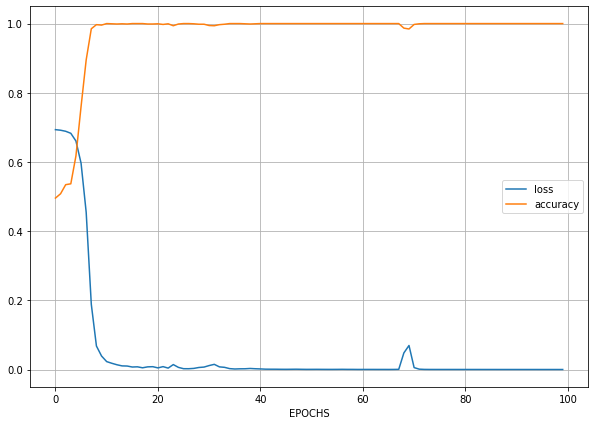

In [ ]:
pd.DataFrame(history4.history).plot(figsize = (10,7))
plt.grid(True)
plt.xlabel("EPOCHS")
#we can see that training converges very quickly

### USING DIFFERENT EVALUATION METRICS AND METHODS FOR THE EVALUATION OF CLASSIFICATION MODELS: 
* PRECISION
* RECALL
* F1-SCORE
* CONFUSION MATRIX
* ACCURACY
* ROC CURVE


In [ ]:
y_pred = model4.predict(x_test)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print(f"THE PRECISION OF MODEL4 IS: {precision_score(tf.round(y_pred),y_test)}")
print(f"THE RECALL OF MODEL4 IS: {recall_score(tf.round(y_pred),y_test)}")
print(f"THE F1 SCORE OF MODEL4 IS: {f1_score(tf.round(y_pred),y_test)}")

THE PRECISION OF MODEL4 IS: 1.0
THE RECALL OF MODEL4 IS: 0.9950980392156863
THE F1 SCORE OF MODEL4 IS: 0.9975429975429976


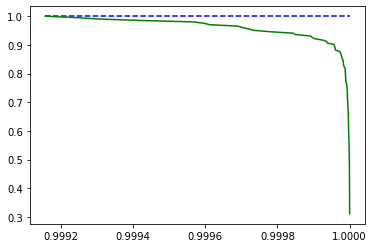

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_test,y_pred)
def plot_precision_recallvsthreshold_curve(precisions,recalls,thresholds):
  plt.plot(thresholds,precisions[:-1],"b--",label = "PRECISION")
  plt.plot(thresholds,recalls[:-1],"g-",label = "RECALL")
plot_precision_recallvsthreshold_curve(precisions,recalls,thresholds)

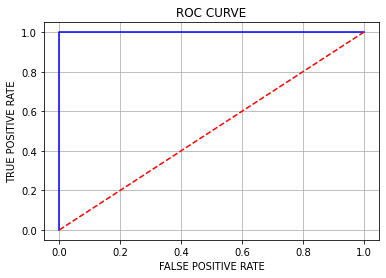

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
def plot_roc_curve(tpr,fpr,thresholds):
  plt.plot(fpr,tpr,"b-")
  plt.grid(True)
  x = np.linspace(0,1,5)
  y = np.linspace(0,1,5)
  plt.plot(x,y,"r--")
  plt.xlabel("FALSE POSITIVE RATE")
  plt.ylabel("TRUE POSITIVE RATE")
  plt.title("ROC CURVE")
plot_roc_curve(tpr,fpr,thresholds)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,tf.round(y_pred)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       197
           1       1.00      1.00      1.00       203

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



### **IF THERE ARE 99.8% INSTANCES OF A CLASS AND 0.02% INSTANCES OF THE OTHER CLASS, THEN WEIGHTED AND MACRO AVERAGES ARE CALCULATED AS:**
*  scoreweighted_avg = 0.998*scoreclass_0 + 0.002*scoreclass_1
*  scoremacro_avg = 0.5*scoreclass_0 + 0.5*scoreclass_1

###**CONFUSION MATRIX**###

In [ ]:
 from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,tf.round(y_pred))
cm

array([[196,   1],
       [  0, 203]])

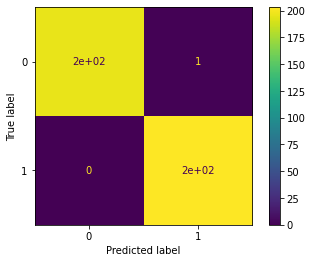

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0','1'])
disp.plot()